# Advertising Sales Channel Prediction:
**Submitted by** Chandrashekar k v BAtch No:1836.

### STATEMENT: 
When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored.

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Importing data:

In [3]:
df=pd.read_csv("Advertising Sales Channel Prediction.csv") 
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


from the above dataset we can observe that sales is the target variable and it's a contnuous data typs, so it is a Regression problem.
And the Unnamed: 0 column was the index column in the raw data set, it has nothing to do with  model training so i'll drop that column.

In [4]:
df=df.drop(["Unnamed: 0"],axis=1)
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Exploratory Data Analysis

In [5]:
#Checking shape of dataset
df.shape

(200, 4)

dataset contains 200 rows and 4 columns.

In [6]:
#reading all column names
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
#Checking data types of each feature
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

all the columns in the dataset are float type data.

In [8]:
#Checking info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


This gives the brief information about the dataset which includes index range, column type, no-null values and memory usage.

In [9]:
#Checking unique values in each column
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

unique values present in all the columns of the dataset.

In [10]:
#Checking the number of null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

there are no null values present in the dataset.

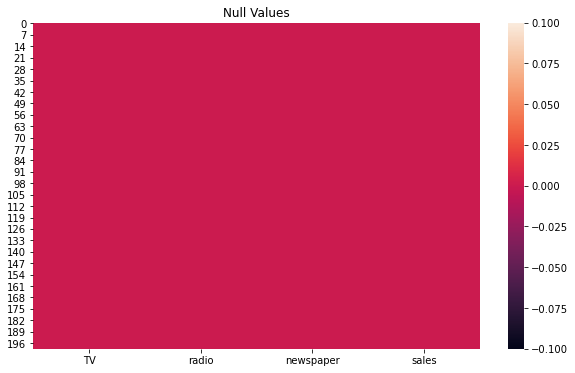

In [11]:
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

we can observe there are no null values in the data set.

In [12]:
#Checking unique values in target column
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

these are the uique values present in the target column.

In [13]:
#Checking for any empty observation in target column
df.loc[df['sales'] == " "]

,TV,radio,newspaper,sales


So from the above observation we can say that there is no empty observation in target variable column.

In [14]:
#Checking for value count of target column
df['sales'].value_counts()

9.7     5
15.9    4
11.7    4
12.9    4
20.7    3
       ..
25.5    1
15.6    1
17.6    1
3.2     1
20.8    1
Name: sales, Length: 121, dtype: int64

In [15]:
#describing the data set
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


* All the columns count are same which means no null values.
* Mean value of TV is more than the radio and newspaper.

# Data Visualization

## Univariate Analysis

<AxesSubplot:xlabel='TV', ylabel='Density'>

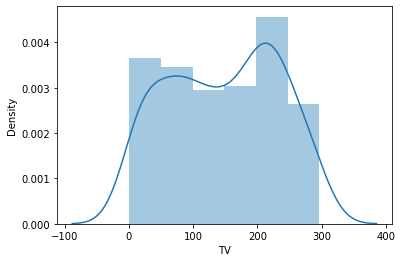

In [16]:
# Checking how the data is distributed in the column TV
sns.distplot(df["TV"])

TV column looks almost normal.

<AxesSubplot:xlabel='radio', ylabel='Density'>

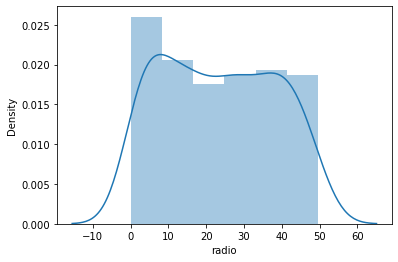

In [17]:
# Checking how the data is distributed in the column radio
sns.distplot(df["radio"])

data looks like normally distributed.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

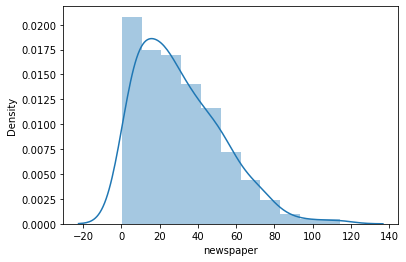

In [18]:
# Checking how the data is distributed in the column newspaper
sns.distplot(df["newspaper"])

Here the data in the newpaper feature contains left skewness.

<AxesSubplot:xlabel='sales', ylabel='Density'>

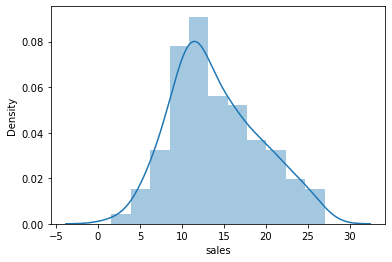

In [19]:
# Checking how the data is distributed in the target variable sales
sns.distplot(df["sales"])

The data is almost normally distributed.

## Bivariate Analysis

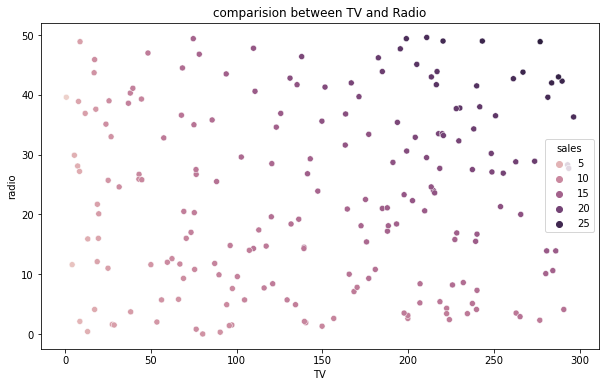

In [21]:
plt.figure(figsize=[10,6])
plt.title('comparision between TV and Radio')
sns.scatterplot(df['TV'],df['radio'], hue=df['sales']);

there is no linear relationship between TV and radio in the above plot.

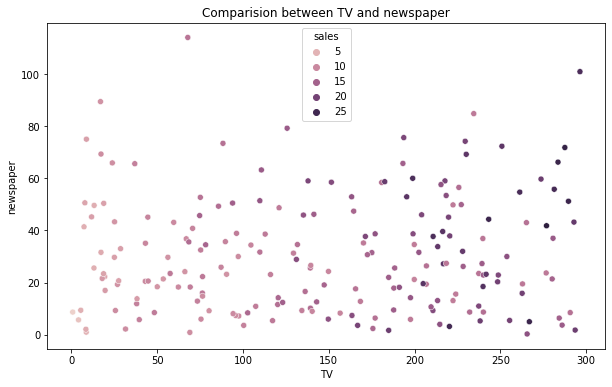

In [22]:
#Comparision between features using scatter plot
plt.figure(figsize=[10,6])
plt.title('Comparision between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"]);

TV and newspaper has a ascending format with sales.

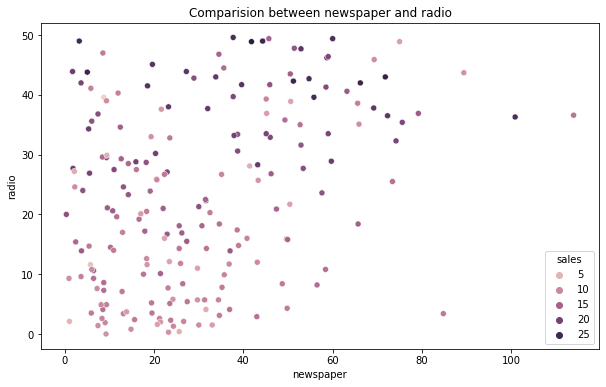

In [23]:
#Comparision between features using scatter plot
plt.figure(figsize=[10,6])
plt.title('Comparision between newspaper and radio')
sns.scatterplot(df['newspaper'],df['radio'],hue=df["sales"]);

Newspaper and radio are scattered with sales.

## Multivariate Analysis:

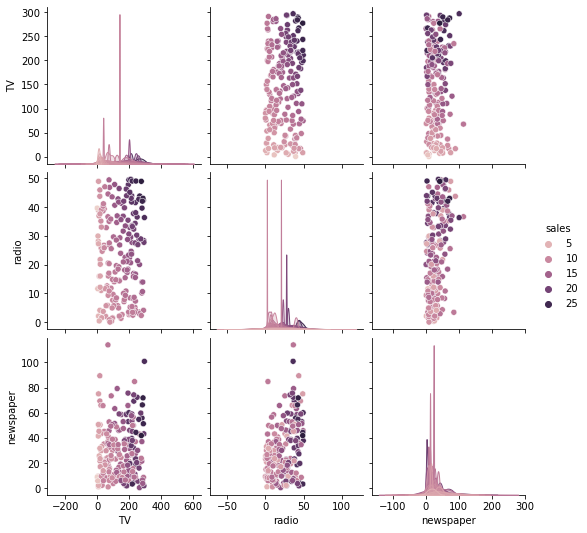

In [24]:
#pair ploting for df
sns.pairplot(df,hue="sales")

# Identifying the outliers:

<AxesSubplot:>

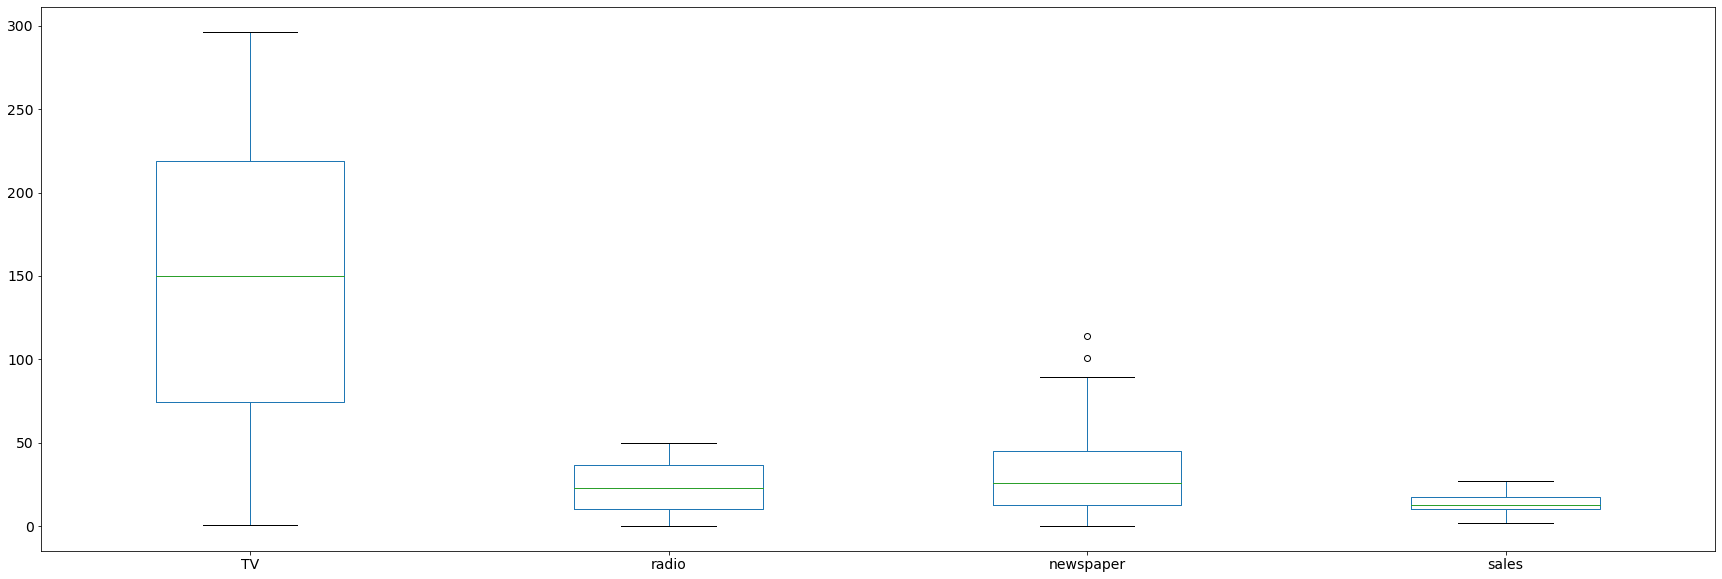

In [25]:
df.plot(kind='box',fontsize=14,figsize=(30,10))

outliers present in newspaper column.

# Removing outliers:
## i) Zscore method:

In [26]:
dfOutliers = df[["newspaper"]]

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(dfOutliers))
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [28]:
#Checking the shape of old dataset
df.shape

(200, 4)

In [29]:
#Checking the shape of new data
df_new.shape

(198, 4)

after removing the outliers we have 198 rows and 4 columns.

In [30]:
#Checking dataloss in zscore method
Dataloss=(((200-198)/200)*100)
Dataloss

1.0

data loss in zscore method is just 1%, which is good, it won't affect the model.

## ii) IQR method:

In [31]:
Q1=dfOutliers.quantile(0.25)
Q3=dfOutliers.quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [32]:
#Checking shape of new dataset
df_1.shape

(198, 4)

this is the shape of the dataset after removing the outliers by IQR method.

In [33]:
#Checking the data loss after using IQR method.
Dataloss=(((200-198)/200)*100)
Dataloss

1.0

In IQR method also i'm getting 1% data loss.

I can either consider zscore method or IQR method since the dataloss in both the methods is same.Let me stick on to zscore itself.

# Checking for skewness:

In [34]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

skewness present in newspaper column

# Removing skewness using yeo-johnson method:

In [35]:
feature=['newspaper']

In [36]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [37]:
df_new[feature] = scaler.fit_transform(df_new[feature].values)

In [38]:
#Checking skewness after removing skewness from newspaper column.
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

After using yeo-johnson method skewness is completely removed from the dataset.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

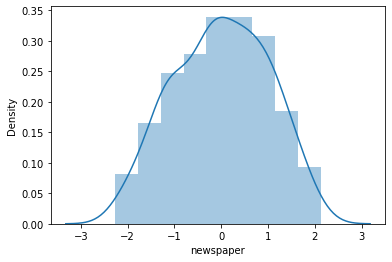

In [39]:
#distplot for newspaper
sns.distplot(df_new['newspaper'])

Newspaper column looks normally distributed compared to previous one.

# Correlation between the target variable and independent variables using HEAT map

In [42]:
cor=df_new.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.038288,0.779121
radio,0.051978,1.000000,0.296570,0.576748
newspaper,0.038288,0.296570,1.000000,0.191387
sales,0.779121,0.576748,0.191387,1.000000


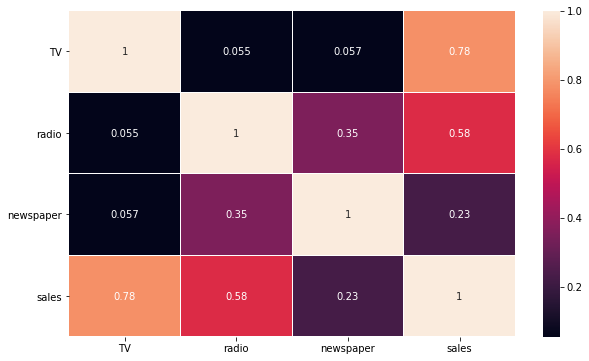

In [43]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),linewidths=.1, annot = True)
plt.yticks(rotation=0);

* We can observe the target variable sales are highly correlated with TV.
* sales are moderately correlated with radio.
* sales are less correlated with newspaper.

# Visualizing correlations of the target variable using bar plot:

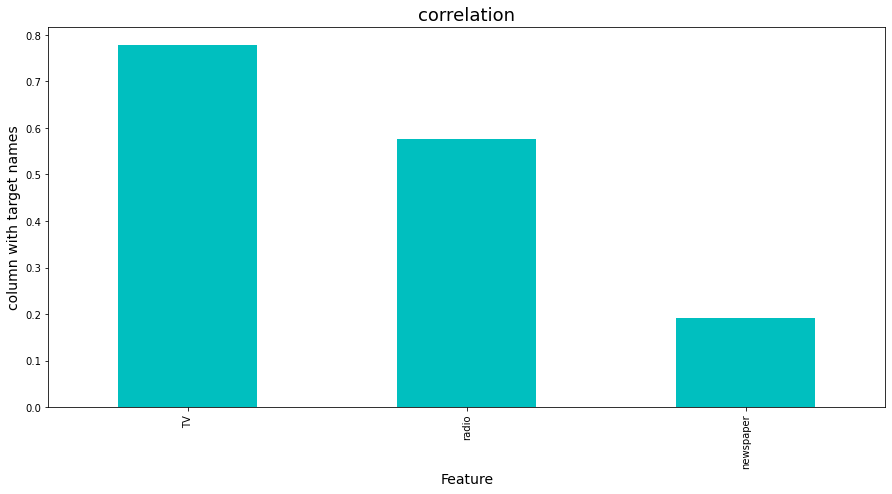

In [44]:
plt.figure(figsize=(15,7))
df_new.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Tv is highly correlated with target variable then radio and newspaper is less correlated with target variable.

In [45]:
#Printing final dataset after EDA part
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,1.604196,22.1
1,44.5,39.3,0.831044,10.4
2,17.2,45.9,1.607052,9.3
3,151.5,41.3,1.283768,18.5
4,180.8,10.8,1.280622,12.9
...,...,...,...,...
195,38.2,3.7,-0.687435,7.6
196,94.2,4.9,-1.146090,9.7
197,177.0,9.3,-1.314437,12.8
198,283.6,42.0,1.517395,25.5


# Preprocessing:

In [46]:
x = df_new.drop("sales",axis=1)
y = df_new["sales"]

# Scaling the data using MinMax scaler:

In [47]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [48]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [49]:
x

,TV,radio,newspaper
0,0.783202,0.762097,0.878788
1,0.149539,0.792339,0.703678
2,0.056333,0.925403,0.879435
3,0.514851,0.832661,0.806215
4,0.614886,0.217742,0.805502
...,...,...,...
193,0.128030,0.074597,0.359758
194,0.319222,0.098790,0.255878
195,0.601912,0.187500,0.217749
196,0.965859,0.846774,0.859129


# Finding best Random state and accuracy:

In [50]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9358346827439895  on Random_state  90


In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression algorithms:

In [52]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Linear Regression:

In [53]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9358346827439895


# Stochastic Gradient Descent Regressor:

In [57]:
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
pred=SGD.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9206001734728808


# DecisionTreeRegressor:

In [54]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9632249232837057


# RandomForestRegressor:

In [55]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9730146220196414


# SupportVectorRegressor:

In [63]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9388708730222921


# K-Neighbor Regressor:

In [56]:
knnr=KNN()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9418441969804539


# Cross Validation Score:

In [58]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.8857739370001966


In [59]:
print(cross_val_score(SGD,x,y,cv=5).mean())

0.8830593511127584


In [60]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.955539116139717


In [61]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9770606412510595


In [64]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.91278463451271


In [65]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.9407052322824345


from the above cross validation technique we can observe that KNN is our best model.

# Hyperparameter tunning:

In [66]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [67]:
parameter = {'n_neighbors':[1,2,3,4,5,6],
             'weights':['uniform','distance'],
             'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_jobs':[1,2,3,4,5]}

In [68]:
GCV=GridSearchCV(KNN(),parameter,cv=5)

In [69]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [70]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': 1, 'n_neighbors': 4, 'weights': 'distance'}

In [71]:
Final_mod=KNN(algorithm='auto',n_jobs=1,n_neighbors=4,weights='distance')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

94.3463529971545


After tuning KNN model i'm getting 94.35% as best r2_score.

# Saving the model:

In [72]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"AdvertisementSalesChannelPrediction.pkl")

['AdvertisementSalesChannelPrediction.pkl']